In [1]:
import numpy as np
import h5py
import tensorflow 
from tensorflow.keras.layers import Dropout, Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D 
from tensorflow.keras.applications import DenseNet121
#from densenet121 import DenseNet 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#import matplotlib.pyplot as plt
#import pandas as pd
from sklearn.metrics import accuracy_score
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [31]:
data_dir = 'FER+CK/train/'
val_dir = 'FER+CK/val/'

In [13]:
epochs = 300
batch_size = 32
target_size = (48,48)

In [14]:
datagen_train = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(data_dir,
                                                    target_size=target_size,
                                                    batch_size= batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True)

datagen_val = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

val_generator = datagen_val.flow_from_directory(val_dir,
                                                target_size=target_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=False) 

Found 29430 images belonging to 7 classes.
Found 6723 images belonging to 7 classes.


In [15]:
densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(48,48,3)
)

In [16]:
def build_model():
    model = Sequential()
    model.add(densenet)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=0.0001),
        metrics=['accuracy']
    )
    
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7175      
Total params: 7,044,679
Trainable params: 6,961,031
Non-trainable params: 83,648
_________________________________________________________________


In [17]:
my_callbacks = [
                EarlyStopping(monitor='val_accuracy', min_delta=1e-5, patience=20, mode='auto', verbose=1),
                ModelCheckpoint(filepath='keras_ferck_densenet32.h5', monitor='accuracy', save_best_only=True, save_weights_only=False, mode='auto', verbose=1)
]

In [18]:
history = model.fit(train_generator,
                    epochs=epochs, steps_per_epoch=len(train_generator), # How many mini_batchs we have inside each epoch.
                    validation_data=val_generator,
                    callbacks=my_callbacks,
                    verbose=1)

Epoch 1/300
920/920 [==============================] - 125s 117ms/step - loss: 2.0189 - accuracy: 0.3138 - val_loss: 1.5979 - val_accuracy: 0.4376

Epoch 00001: accuracy improved from -inf to 0.31380, saving model to keras_ferck_densenet32.h5
Epoch 2/300
920/920 [==============================] - 100s 108ms/step - loss: 1.5836 - accuracy: 0.4385 - val_loss: 1.6508 - val_accuracy: 0.5084

Epoch 00002: accuracy improved from 0.31380 to 0.43853, saving model to keras_ferck_densenet32.h5
Epoch 3/300
920/920 [==============================] - 101s 110ms/step - loss: 1.4178 - accuracy: 0.4982 - val_loss: 1.3090 - val_accuracy: 0.5343

Epoch 00003: accuracy improved from 0.43853 to 0.49817, saving model to keras_ferck_densenet32.h5
Epoch 4/300
920/920 [==============================] - 110s 119ms/step - loss: 1.2996 - accuracy: 0.5302 - val_loss: 1.3291 - val_accuracy: 0.5715

Epoch 00004: accuracy improved from 0.49817 to 0.53017, saving model to keras_ferck_densenet32.h5
Epoch 5/300
920/920


Epoch 00034: accuracy improved from 0.83146 to 0.83846, saving model to keras_ferck_densenet32.h5
Epoch 35/300
920/920 [==============================] - 58s 63ms/step - loss: 0.4348 - accuracy: 0.8416 - val_loss: 0.7139 - val_accuracy: 0.7751

Epoch 00035: accuracy improved from 0.83846 to 0.84162, saving model to keras_ferck_densenet32.h5
Epoch 36/300
920/920 [==============================] - 58s 63ms/step - loss: 0.4208 - accuracy: 0.8456 - val_loss: 0.6974 - val_accuracy: 0.7809

Epoch 00036: accuracy improved from 0.84162 to 0.84563, saving model to keras_ferck_densenet32.h5
Epoch 37/300
920/920 [==============================] - 58s 63ms/step - loss: 0.4077 - accuracy: 0.8528 - val_loss: 0.6951 - val_accuracy: 0.7830

Epoch 00037: accuracy improved from 0.84563 to 0.85277, saving model to keras_ferck_densenet32.h5
Epoch 38/300
920/920 [==============================] - 59s 64ms/step - loss: 0.4009 - accuracy: 0.8537 - val_loss: 0.6743 - val_accuracy: 0.7998

Epoch 00038: accura

Epoch 70/300
920/920 [==============================] - 59s 65ms/step - loss: 0.2008 - accuracy: 0.9283 - val_loss: 0.7230 - val_accuracy: 0.8206

Epoch 00070: accuracy did not improve from 0.93221
Epoch 71/300
920/920 [==============================] - 59s 64ms/step - loss: 0.1821 - accuracy: 0.9333 - val_loss: 0.7660 - val_accuracy: 0.8081

Epoch 00071: accuracy improved from 0.93221 to 0.93330, saving model to keras_ferck_densenet32.h5
Epoch 72/300
920/920 [==============================] - 59s 64ms/step - loss: 0.1853 - accuracy: 0.9332 - val_loss: 0.7686 - val_accuracy: 0.8162

Epoch 00072: accuracy did not improve from 0.93330
Epoch 73/300
920/920 [==============================] - 59s 64ms/step - loss: 0.1911 - accuracy: 0.9330 - val_loss: 0.7167 - val_accuracy: 0.8282

Epoch 00073: accuracy did not improve from 0.93330
Epoch 74/300
920/920 [==============================] - 59s 64ms/step - loss: 0.1851 - accuracy: 0.9354 - val_loss: 0.7746 - val_accuracy: 0.8153

Epoch 00074: a

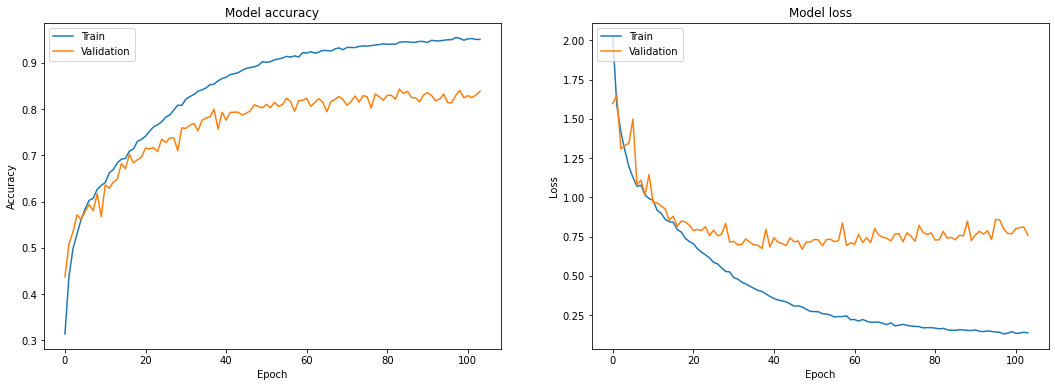

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(18, 6))

# Plot training & validation accuracy values

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
model_json = model.to_json()
with open("keras_ferck_densenet121-32.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
predictions = model.predict(val_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_generator.classes
class_names = val_generator.class_indices.keys()

print("Model Accuracy on test set: {:.4f}".format(accuracy_score(y_test, y_pred)))

Model Accuracy on test set: 0.8318


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       990
           1       0.95      0.80      0.87       162
           2       0.79      0.82      0.81      1025
           3       0.95      0.94      0.95      1796
           4       0.83      0.78      0.81      1734
           5       0.81      0.84      0.82       414
           6       0.62      0.57      0.60       602

    accuracy                           0.83      6723
   macro avg       0.82      0.81      0.81      6723
weighted avg       0.83      0.83      0.83      6723



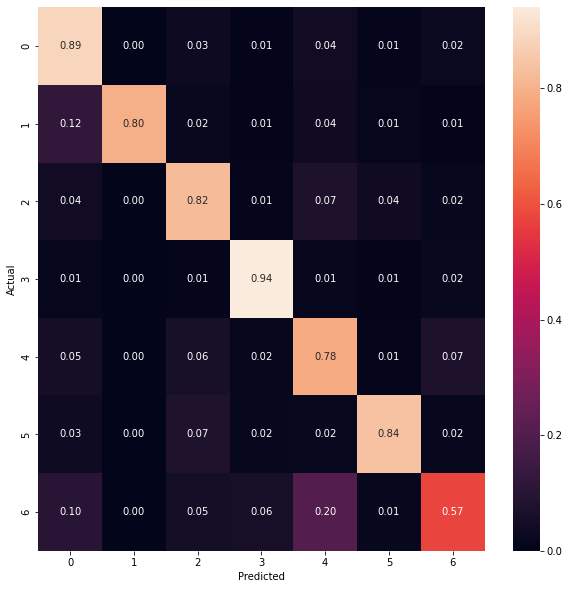

In [23]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [41]:
test_dir = 'FER_test/'

datagen_test = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        shear_range=.2,
                        horizontal_flip=True)

test_generator = datagen_test.flow_from_directory(test_dir,
                                                target_size=(48,48),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb',
                                                shuffle=False) 

Found 106 images belonging to 7 classes.


In [42]:
scores = model.evaluate(test_generator, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : ",scores[0])

4/4 [==============================] - 0s 41ms/step - loss: 0.8693 - accuracy: 0.8208

Model Accuracy: 82.08%
Loss :  0.8692904114723206


In [43]:
predictions = model.predict(test_generator)
Y_pred = [np.argmax(probas) for probas in predictions]
Y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

print("Model Predict Accuracy on test set: {:.4f}".format(accuracy_score(Y_test, Y_pred)))

Model Predict Accuracy on test set: 0.8585


In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.80      0.89        15
           2       0.75      0.80      0.77        15
           3       0.87      0.87      0.87        15
           4       0.93      0.81      0.87        16
           5       0.87      0.87      0.87        15
           6       0.76      0.87      0.81        15

    accuracy                           0.86       106
   macro avg       0.87      0.86      0.86       106
weighted avg       0.87      0.86      0.86       106



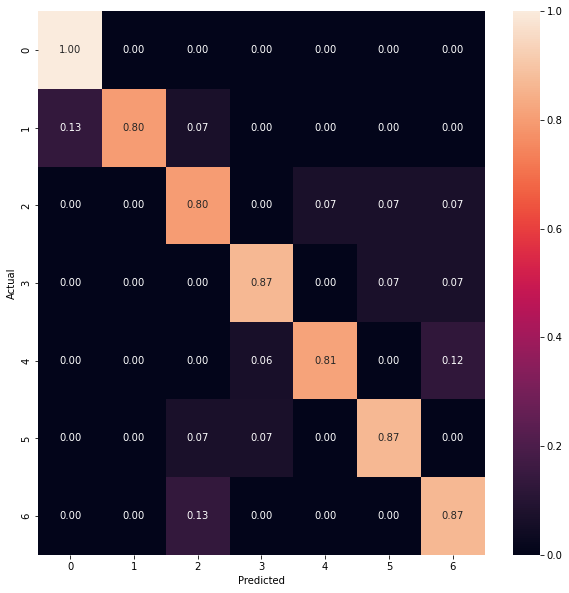

In [45]:
cm = confusion_matrix(Y_test, Y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)